In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import gc

In [42]:
train = pd.read_csv("regression.csv", index_col=0)
def identify_and_remove_unique_columns(Dataframe):
    unique_counts = Dataframe.nunique()
    record_single_unique = pd.DataFrame(unique_counts[unique_counts == 1]).reset_index().rename(columns = {'index': 'feature', 0: 'nunique'})
    to_drop = list(record_single_unique['feature'])
    Dataframe = Dataframe.drop(columns = to_drop)
    return Dataframe


In [53]:
train_x = train.iloc[:,:700]
train_x = identify_and_remove_unique_columns(pd.DataFrame(train_x))
train_y = train.iloc[:,700:]

In [54]:
# ------------------------------------------------------

Interquartile0_25 = np.array(train_y.quantile(0.25))
Interquartile0_75 = np.array(train_y.quantile(0.75))
IQR = Interquartile0_75 - Interquartile0_25

# Median for each features
median = np.array(train_y.median())


# sigmoid transformation
numeric_features = (1+np.exp((-train_y + median)/(0.5*IQR)))**(-1)
train_y = numeric_features.sum(axis=1)
# ------------------------------------------------------

In [55]:


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.33, random_state=42)
#del train
#del train_x
#del train_y
gc.collect();


# Base lines metric mse l1

In [56]:
len(train_y.unique())

4489

In [57]:
# naive prediction with mean 
from sklearn.metrics import mean_squared_error,  mean_absolute_error
print(" mean absolute error")
print(np.abs(y_test - y_test.mean()).mean())
print(" \n")
print(" mean squares error")
print(np.square(y_test - y_test.mean()).mean())

 mean absolute error
0.45586001818000027
 

 mean squares error
0.3044907752894198


# Linear Model

In [58]:
from sklearn import linear_model
from sklearn import neural_network
import lightgbm  as lgb
Linear_regression_model = linear_model.Ridge(alpha=.5)
from sklearn.metrics import mean_squared_error, mean_absolute_error

#Linear_regression_model = linear_model.LinearRegression()
Linear_regression_model = neural_network.MLPRegressor()
#Linear_regression_model = linear_model.Ridge(alpha=.5)
#Linear_regression_model = lgb.LGBMRegressor()
Linear_regression_model.fit(X_train, y_train)

y_train_prediction = Linear_regression_model.predict(X_train)

print("Mean squared error: %.8f" % mean_squared_error(y_train, y_train_prediction))

print("Mean absolute error: %.8f" % mean_absolute_error(y_train, y_train_prediction))

Mean squared error: 0.00013369
Mean absolute error: 0.00812271


In [59]:
y_test_prediction = Linear_regression_model.predict(X_test)

print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_prediction))

print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_prediction))

Mean squared error: 0.36
Mean absolute error: 0.49


In [25]:
import pickle
pickle.dump(Linear_regression_model, open('../models/linear_predict.pkl', 'wb'))

In [26]:
tmp = X_train.iloc[:, :200]

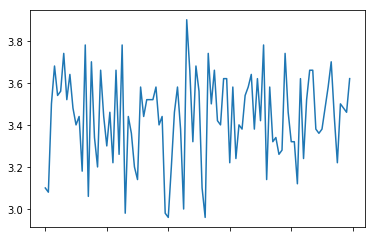

In [17]:
#y_train.iloc[:100, 2].plot()

In [36]:
y_train.iloc[:,-1].value_counts()

3.42    2209
3.40    2161
3.44    2157
3.38    2120
3.34    2110
3.36    2096
3.46    2083
3.48    2034
3.32    1960
3.50    1915
3.30    1846
3.52    1712
3.28    1671
3.54    1663
3.56    1548
3.26    1541
3.58    1385
3.24    1362
3.22    1226
3.20    1148
3.60    1139
3.62     990
3.18     938
3.64     860
3.16     774
3.66     727
3.14     662
3.68     641
3.70     540
3.12     528
        ... 
3.00     147
3.82     121
2.98     118
3.84      90
2.96      89
2.94      68
3.88      57
3.86      57
2.92      48
3.90      40
2.90      36
3.92      22
2.88      22
3.94      14
2.86      12
2.84      11
3.96      10
3.98       9
2.82       6
2.80       6
2.76       4
2.78       4
4.00       4
4.02       3
4.12       2
4.04       2
4.20       1
4.08       1
2.74       1
2.66       1
Name: metric_4, Length: 70, dtype: int64

In [35]:
y_train.iloc[:,0].value_counts()

564.130435    1922
374.282609    1920
488.782609    1914
334.152174    1897
342.847826    1895
419.108696    1889
397.456522    1888
577.695652    1888
585.782609    1878
379.760870    1877
378.891304    1876
322.021739    1875
341.652174    1874
434.739130    1868
559.260870    1868
418.869565    1867
549.391304    1862
431.434783    1854
565.391304    1851
485.500000    1847
725.956522    1846
394.043478    1846
440.782609    1838
509.760870    1830
588.586957    1795
386.760870    1792
353.173913    1546
357.826087     707
376.021739      58
696.260870      16
400.565217       6
383.500000       5
501.456522       5
489.847826       4
438.043478       3
310.217391       3
419.173913       2
652.260870       1
475.913043       1
487.826087       1
Name: metric_2, dtype: int64

In [20]:
len(y_train)

47712